# Random Sample Imputation

## Numerical Data

### Using Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [5]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [6]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

Making a new columns and we will use the operations there.

In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_train['Age']

In [9]:
X_train.head(5)

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


Try to understand this code this is very important.

In [10]:
X_train['Age_imputed'] = X_train['Age'].copy() # Create a copy of the 'Age' column to avoid modifying the original data
X_test['Age_imputed'] = X_test['Age'].copy() # Create a copy of the 'Age' column in X_test

# Impute missing values in X_train
num_null_train = X_train['Age_imputed'].isnull().sum()
if num_null_train > 0:  # Check if there are any missing values to impute
    X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(num_null_train, random_state=0).values # Use random_state for reproducibility

# Impute missing values in X_test
num_null_test = X_test['Age_imputed'].isnull().sum()
if num_null_test > 0:  # Check if there are any missing values to impute
    X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(num_null_test, random_state=0).values # Use random_state for reproducibility

The above code is used to handle missing values in the "Age_imputed" columns of both the training (X_train) and testing (X_test) datasets by imputing them with random samples from the available "Age" values. Specifically, the code does the following:

- **For the training data (X_train):** It checks for missing values (NaN) in the Age_imputed column. For each missing value, it randomly selects an equivalent number of non-missing values from the Age column (using .dropna() to exclude the NaN values) and assigns them to the missing spots in the Age_imputed column.

- **For the testing data (X_test):** A similar process occurs. The code checks for missing values in the Age_imputed column of X_test and imputes them with random samples drawn from the available Age values in X_test.

In [11]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,23.0
493,71.0,49.5042,71.0
527,NaN,221.7792,60.0


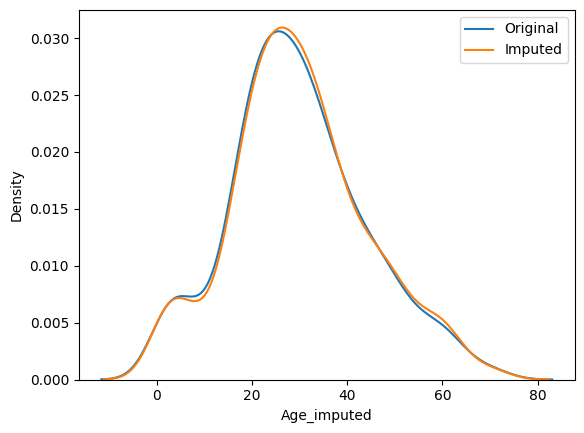

In [12]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

No similarity in the distributions.

In [13]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  204.96152644874317


No similarity in the variance

In [14]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,63.137063
Age,71.512440,204.349513,204.349513
Age_imputed,63.137063,204.349513,204.961526


In covariance these is a difference.

<Axes: >

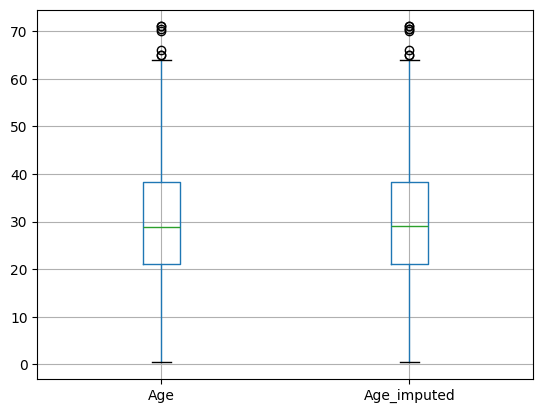

In [15]:
X_train[['Age', 'Age_imputed']].boxplot()

In [16]:
# Assuming 'observation' should be a row from X_train and you're trying to
# sample based on the 'Fare' of a particular row, you might need to iterate
# through X_train. Here's an example using iterrows:

sampled_values = []  # To store sampled values for each observation

for index, observation in X_train.iterrows():
    sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))
    sampled_values.append(sampled_value)

# Now 'sampled_values' will contain a list of sampled values, one for each row in X_train.

## Categorical Data

### Using House Train Data
Advanced Regression Housing Dataset

In [17]:
df_cat = pd.read_csv('/content/housing_data.csv', usecols = ['GarageQual', 'FireplaceQu', 'SalePrice'])

In [18]:
df_cat.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [19]:
df_cat.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [20]:
X_cat = df_cat
y_cat = df_cat['SalePrice']

In [21]:
X_train_cat,X_test_cat,y_train_cat,y_test_cat = train_test_split(X_cat,y_cat,test_size=0.2,random_state=2)

In [22]:
X_train_cat['GarageQual_imputed'] = X_train_cat['GarageQual']
X_test_cat['GarageQual_imputed'] = X_test_cat['GarageQual']

X_train_cat['FireplaceQu_imputed'] = X_train_cat['FireplaceQu']
X_test_cat['FireplaceQu_imputed'] = X_test_cat['FireplaceQu']

In [23]:
X_train_cat.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
404,TA,TA,168000,TA,TA
468,Gd,TA,250000,TA,Gd
800,NaN,TA,200000,TA,NaN
900,NaN,TA,110000,TA,NaN
759,TA,TA,290000,TA,TA


In [24]:
X_train_cat['GarageQual_imputed'][X_train_cat['GarageQual_imputed'].isnull()] = X_train_cat['GarageQual'].dropna().sample(X_train_cat['GarageQual'].isnull().sum()).values
X_test_cat['GarageQual_imputed'][X_test_cat['GarageQual_imputed'].isnull()] = X_train_cat['GarageQual'].dropna().sample(X_test_cat['GarageQual'].isnull().sum()).values

X_train_cat['FireplaceQu_imputed'][X_train_cat['FireplaceQu_imputed'].isnull()] = X_train_cat['FireplaceQu'].dropna().sample(X_train_cat['FireplaceQu'].isnull().sum()).values
X_test_cat['FireplaceQu_imputed'][X_test_cat['FireplaceQu_imputed'].isnull()] = X_train_cat['FireplaceQu'].dropna().sample(X_test_cat['FireplaceQu'].isnull().sum()).values

The code provided is performing imputation for missing values in categorical columns of two datasets, X_train_cat and X_test_cat, specifically for the GarageQual and FireplaceQu features. Here's how it works:

- **Imputation of `GarageQual`:** In the X_train_cat dataset, the missing values in the GarageQual_imputed column (a new column created for imputation) are being filled with random samples from the non-missing values in the GarageQual column. The number of samples corresponds to the count of missing values in GarageQual_imputed. This is done using .dropna() to exclude any existing missing values in GarageQual and .sample() to randomly select the necessary number of values. The same imputation strategy is applied to X_test_cat for its GarageQual_imputed column, where missing values are imputed using random samples from the non-missing GarageQual values in the training set (X_train_cat).

- **Imputation of `FireplaceQu`:** The same procedure is applied to the FireplaceQu feature. Missing values in the FireplaceQu_imputed column in both X_train_cat and X_test_cat are imputed using random samples from the non-missing values in the corresponding FireplaceQu column.

In [25]:
temp = pd.concat(
        [
            X_train_cat['GarageQual'].value_counts() / len(X_train_cat['GarageQual'].dropna()),
            X_train_cat['GarageQual_imputed'].value_counts() / len(X_train_cat)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

The code compares the distribution of the `GarageQual` feature before and after imputation. It calculates the proportion of each category in both the original data (`GarageQual`) and the imputed data (`GarageQual_imputed`). First, it counts the occurrences of each category and normalizes these counts by the total number of non-missing values for the original data and the total number of entries for the imputed data. Then, it combines these proportions side-by-side into a new DataFrame for easy comparison. This helps assess if the imputation process has affected the category distribution, which is crucial for maintaining data integrity.

In [26]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [27]:
temp = pd.concat(
        [
            X_train_cat['FireplaceQu'].value_counts() / len(X_train_cat['FireplaceQu'].dropna()),
            X_train_cat['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.650954
TA,0.412439,0.540965
Fa,0.040917,0.053872
Po,0.027823,0.034792
Ex,0.024550,0.030303


The code compares the distribution of the `FireplaceQu` feature before and after imputation. It calculates the proportions of each category in the original data (`FireplaceQu`) by dividing the count of each category by the total number of non-missing values. For the imputed data (`FireplaceQu_imputed`), proportions are calculated by dividing the count of each category by the total number of rows in the dataset. The proportions from both columns are then combined side-by-side into a DataFrame for easy comparison. This helps assess if the imputation process has significantly altered the distribution of categories.

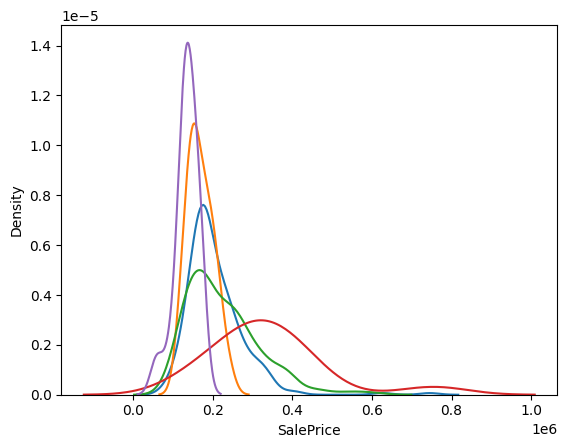

In [28]:
for category in X_train_cat['FireplaceQu'].dropna().unique():
    sns.distplot(X_train_cat[X_train_cat['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

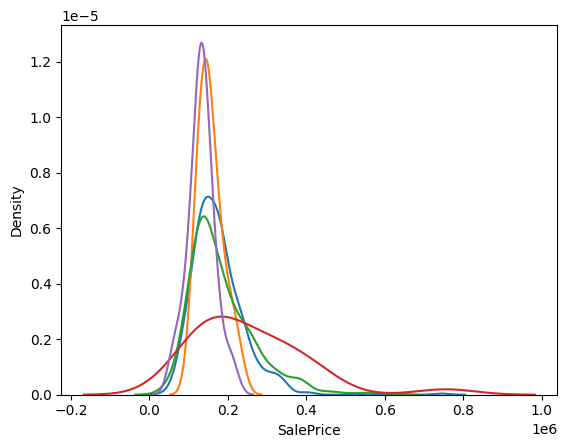

In [29]:
for category in X_train_cat['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train_cat[X_train_cat['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

This distribution is not good, because if we use the linear model then due to its unusal distribution it can create some other problems.

<hr>

# Missing Indicator Imputation

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import MissingIndicator, SimpleImputer

In [31]:
df_mii = pd.read_csv('/content/train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [32]:
df_mii.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
X_mii = df_mii.drop(columns = ['Survived'])
y_mii = df_mii['Survived']

In [34]:
X_train_mii, X_test_mii, y_train_mii, y_test_mii = train_test_split(X_mii, y_mii, test_size=0.2, random_state=2)

In [35]:
X_train_mii.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


### Without Missing Indicator

In [37]:
si = SimpleImputer()
X_train_trf_mii = si.fit_transform(X_train_mii)
X_test_trf_mii = si.transform(X_test_mii)

In [38]:
X_train_trf_mii

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train_trf_mii, y_train)
y_pred_mii = lr.predict(X_test_trf_mii)
accuracy_score(y_test_mii, y_pred_mii)

0.6145251396648045

## With Missing Indicator using Pandas

In [41]:
mi = MissingIndicator()
mi.fit(X_train_mii)

MissingIndicator()

In [42]:
mi.features_

array([0])

In [44]:
X_train_missing = mi.transform(X_train_mii)
X_test_missing = mi.transform(X_test_mii)

In [45]:
X_train_mii['Age_NA'] = X_train_missing
X_test_mii['Age_NA'] = X_test_missing

In [46]:
X_train_mii

,Age,Fare,Age_NA
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False
...,...,...,...
534,30.0,8.6625,False
584,NaN,8.7125,True
493,71.0,49.5042,False
527,NaN,221.7792,True


In [48]:
X_test_mii

,Age,Fare,Age_NA
707,42.0,26.2875,False
37,21.0,8.0500,False
615,24.0,65.0000,False
169,28.0,56.4958,False
68,17.0,7.9250,False
...,...,...,...
89,24.0,8.0500,False
80,22.0,9.0000,False
846,NaN,69.5500,True
870,26.0,7.8958,False


In [51]:
si = SimpleImputer()
X_train_trf_mii = si.fit_transform(X_train_mii)
X_test_trf_mii = si.transform(X_test_mii)

In [52]:
lr = LogisticRegression()
lr.fit(X_train_trf_mii, y_train)
y_pred_mii = lr.predict(X_test_trf_mii)
accuracy_score(y_test_mii, y_pred_mii)

0.6312849162011173

## One Line Missing Indicator

### Simple Imputer having Missing Indicator Signature

`add_indicator = True => Missing Indicator`

In one line you can implement the Missing Indicator

In [54]:
si = SimpleImputer(add_indicator=True)

In [55]:
X_train_mii = si.fit_transform(X_train_mii)
X_test_mii = si.transform(X_test_mii)

In [56]:
lr = LogisticRegression()
lr.fit(X_train_mii, y_train)
y_pred_mii = lr.predict(X_test_mii)
accuracy_score(y_test_mii, y_pred_mii)

0.6312849162011173

# Automatically select value for Imputation

It uses the `gridsearchCV`

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [58]:
df_gsv = pd.read_csv("/content/train.csv")

In [59]:
df_gsv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df_gsv.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

In [61]:
df_gsv.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [62]:
X_gsv = df_gsv.drop(columns = ['Survived'])
y_gsv = df_gsv['Survived']

In [63]:
X_train_gsv, X_test_gsv, y_train_gsv, y_test_gsv = train_test_split(X_gsv, y_gsv, test_size = 0.2, random_state = 2)

In [64]:
X_test_gsv.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,male,42.0,0,0,26.2875,S
37,3,male,21.0,0,0,8.0500,S
615,2,female,24.0,1,2,65.0000,S
169,3,male,28.0,0,0,56.4958,S
68,3,female,17.0,4,2,7.9250,S


In [65]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

In [70]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [71]:
lr = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [72]:
from sklearn import set_config
set_config(display = 'diagram')
lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [75]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]  # Changed this line
}
grid_search = GridSearchCV(lr, param_grid, cv = 10)
grid_search.fit(X_train_gsv, y_train_gsv)
print(f"Best Params: ")
print(grid_search.best_params_)

Best Params: 
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [76]:
print(f"Internal CV Score: {grid_search.best_score_: .3f}")

Internal CV Score:  0.788


In [77]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.787852
5,1.0,most_frequent,median,0.787852
6,1.0,constant,mean,0.787852
7,1.0,constant,median,0.787852
8,10.0,most_frequent,mean,0.787852
9,10.0,most_frequent,median,0.787852
10,10.0,constant,mean,0.787852
11,10.0,constant,median,0.787852
12,100.0,most_frequent,mean,0.787852
13,100.0,most_frequent,median,0.787852
